### 이번 실습 목표
1. 감성분석 라이브러리 설치
2. 텍스트에 대한 감성분석하기

감성분석(Sentiment Analysis) 

: 컴퓨터를 통해 텍스트에 들어있는 의견이나 감성, 평가, 태도 등의 주관적인 정보에 있는 긍/부정을 분석하는 것

+ 문장의 감성상태: 기쁨, 슬픔 ,분노 [X] 긍정, 부정, 중립 [0]

 감성분석 활용 사례
- 기업 내부적으로는 고객 피드백, 콜센터 메시지 등과 같은 데이터 분석
- 외부적으로는 기업과 관련된 뉴스나 SNS 홍보물 등에 달린 댓글의 긍/부정을 판단
- 영화를 보기 전에 리뷰를 참고하는 것과 같이 특정 제품이나 서비스를 이용할 지를 결정

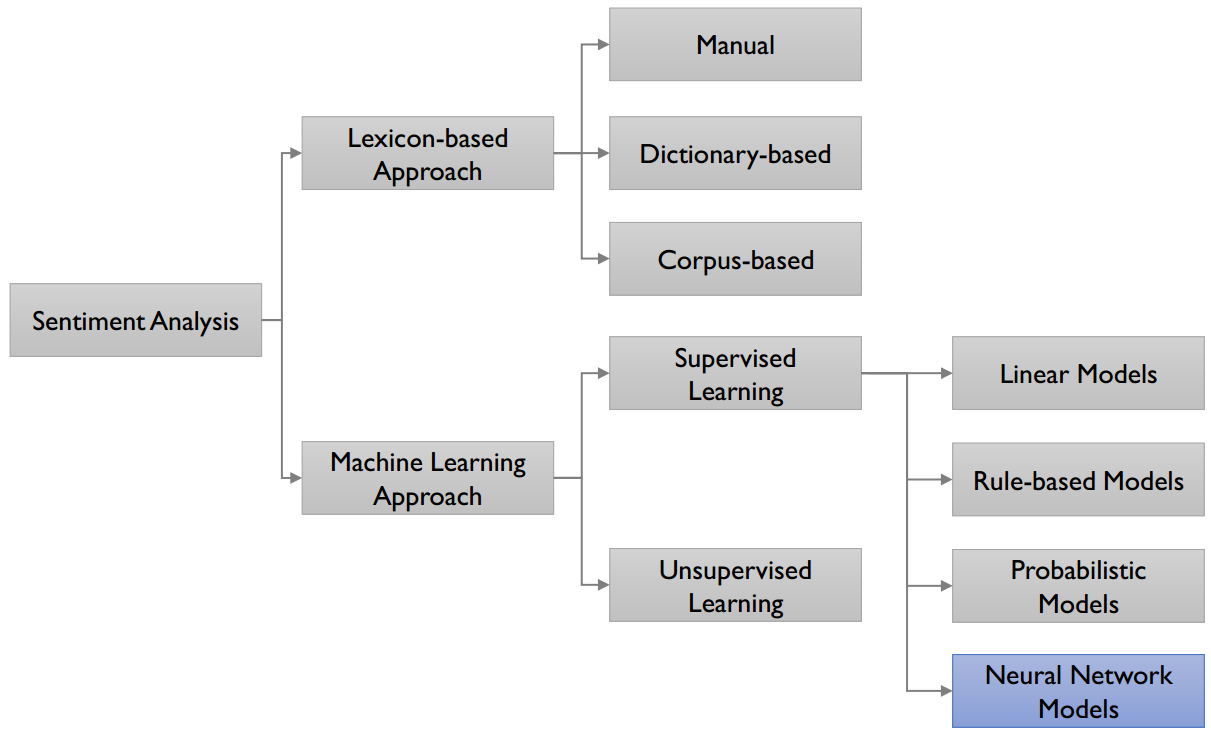

1. 어휘기반 감성분석
- 문장에 포함된 단어에 대한 감성사전을 이용해서 문장의 감성스코어를 바탕으로 긍/부정을 측정
- 감성사전: 모든 단어에 대한 긍/부정 정도를 -1부터 1 사이의 점수로 라벨링한 것(긍정:1/부정:-1)

   ex) 영화 재밌다. => 영화: 0 재밌다: 1
- 같은 어휘여도 사용하는 도메인에 따라 긍/부정 점수가 달라질 수 있어 실질적으로 모든 도메인에 적용이 가능한 감성 사전을 구축하는 것이 매우 어렵다는 단점
   
   ex) 거품이라는 단어는 주식 도메인에서 부정적인 의미를 담고 있습니다. 

2. 머신러닝 기반 감성분석
- 대량의 문장 데이터를 통해서 긍정과 부정적인 문장을 컴퓨터가 알아서 찾아내는 방법 
- 특정 도메인의 문장 데이터가 있다면 컴퓨터가 알아서 특정 도메인에서 나타난 문장에 대한 긍/부정을 분류

머신러닝이란?
- 컴퓨터가 많은 데이터로부터 숨어있는 규칙을 찾는 것(=>모델을 학습하는 것)

머신러닝 활용 예시
- 과거의 스팸메일과 일반메일 내역들을 통해 스팸 메일과 일반 메일을 분류하는 모델을 학습해서 이 모델을 사용해서 자동으로 스팸메일을 필터링해준다.(분류)   
- 많은 손님들의 구매내역 데이터를 통해 쇼핑물에서 손님들이 자주 구매하는 물품의 조합을 찾아낸다.(다빈 패턴 감지)

머신러닝을 활용한 감성분석

: 지도 학습을 통해 문장에서 긍/부정을 분류할 수 있는 모델을 만든다.(그 중 딥러닝을 활용해서 학습시킨다.) 

지도 학습
-  정답도 같이 있는 데이터를 이용해서 모델을 학습시키는 방식으로 감성분석은 문장에 대한 긍/부정을 분류하는 것이 목표이기 때문에 학습 데이터는 문장과 그 문장의 감성 정답으로 구성되어야 합니다.  

    ex) 긍/부정 분류 모델을 학습시키기 위한 지도 학습 데이터 형태: 이 영화 생각보다 괜찮네요 => 라벨(답): 긍정

딥러닝
- 머신러닝을 하는 방법 중 하나로 인공신경망이라는 개념을 사용한 방법
- 실습에서는 tensorflow 라이브러리를 사용해서 딥러닝을 활용한 머신러닝을 진행할 예정
- [딥러닝의 동작 원리에 대한 관심이 있다면?](https://lib.sookmyung.ac.kr/search/detail/CAT000000799456)

[감성분석 자료 출처](https://yngie-c.github.io/nlp/2020/07/31/sentiment_analysis/)

[머신러닝 자료 출처](https://devtimes.com/nlp-korea-movie-review)

#### 감성분석을 위한 머신러닝 라이브러리 설치

감성분류모델 학습에 필요한 머신러닝 라이브러리 설치한 후 관리자 권한으로 CMD를 열고 주피터 노트북을 재실행해야합니다.

In [1]:
! pip install tensorflow

You should consider upgrading via the 'c:\users\82102\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### 머신러닝을 위한 학습데이터 전처리
    학습데이터의 전처리에 따라 모델의 정확도가 달라지기 때문에 가장 중요한 부분입니다.

##### 모델 학습을 위한 데이터와 모델 평가를 위한 데이터 살펴보기

In [1]:
import pandas as pd
train_df = pd.read_csv("ratings_train.txt", "\t")
test_df = pd.read_csv("ratings_test.txt", "\t")

In [2]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [4]:
train_df[["document", "label"]]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0
149996,평점이 너무 낮아서...,1
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


(문장,문자의 긍/부정 정답)에서 문장을 숫자 데이터로 변환을 시켜줘야 딥러닝 모델의 학습이 가능할 수 있습니다.

How?

영화평가 댓글 문장들에서 자주 사용되는 토큰 10000개를 사용해서 문장을 벡터화 합니다.


토큰: 문장 안의 의미있는 단위
토크나이징: 문장을 의미있는 단위로 쪼개놓는 작업

ex) 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 => 흔들리는,꽃,들,속,에서,네,샴푸,향,이,느껴진거야 

9개의 토큰으로 구성있다. 지난 실습에서 배운 konlpy의 Okt를 사용해서 문장을 토크나이징합니다. 


문장 A: The cat sat on my face와 문장 B: The dog sat on my bed에 대한 벡터화 작업 결과
![](https://icim.nims.re.kr/file/f591c701be8d4edcb07d6a59cef4502c.png)

영화평가 댓글의 주요 토큰으로만 구성된 벡터화 작업을 통해 영화평가 댓글을 숫자로 변환시켜주는 작업을 합니다.

##### 형태소 분석기를 사용한 문장 토크나이징 함수 만들기

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
okt.pos(u'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야')#문장을 태킹해주는 함수

[('흔들리는', 'Verb'),
 ('꽃', 'Noun'),
 ('들', 'Suffix'),
 ('속', 'Noun'),
 ('에서', 'Josa'),
 ('네', 'Noun'),
 ('샴푸', 'Noun'),
 ('향', 'Noun'),
 ('이', 'Josa'),
 ('느껴진거야', 'Verb')]

In [7]:
def tokenize(doc):#doc은 토크나이징하고 싶은 문장이 매개변수로 들어옵니다. 
    #형태소와 해당하는 품사를 join
    answer = [] #문장의 토크나이징 결과를 저장하는 리스트
    tokens_list= okt.pos(doc)
    for tk in tokens_list:
        #tk => ('흔들리다','Verb') => '흔들리다/Verb'
        element = '/'.join(tk)
        answer.append(element) 
    return answer

In [8]:
tokenize('흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야')

['흔들리는/Verb',
 '꽃/Noun',
 '들/Suffix',
 '속/Noun',
 '에서/Josa',
 '네/Noun',
 '샴푸/Noun',
 '향/Noun',
 '이/Josa',
 '느껴진거야/Verb']

##### 결측된 데이터에 대한 처리 필수!!

In [9]:
if train_df['document'].isnull().any(): #document에 null값이 하나라도 있다.
    train_df['document'] = train_df['document'].fillna('')#null값을 ''값으로 대체 
if test_df['document'].isnull().any(): #document에 null값이 하나라도 있다
    test_df['document'] = test_df['document'].fillna('') #null값을 ''값으로 대체

In [10]:
train_df.values

array([[9976970, '아 더빙.. 진짜 짜증나네요 목소리', 0],
       [3819312, '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', 1],
       [10265843, '너무재밓었다그래서보는것을추천한다', 0],
       ...,
       [9311800, '이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?', 0],
       [2376369, '청춘 영화의 최고봉.방황과 우울했던 날들의 자화상', 1],
       [9619869, '한국 영화 최초로 수간하는 내용이 담긴 영화', 0]], dtype=object)

In [11]:
test_df.values

array([[6270596, '굳 ㅋ', 1],
       [9274899, 'GDNTOPCLASSINTHECLUB', 0],
       [8544678, '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', 0],
       ...,
       [9072549, '그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다', 0],
       [5802125, '절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네', 0],
       [6070594, '마무리는 또 왜이래', 0]], dtype=object)

##### 학습데이터의 평가 부분을 토큰나이징한 결과와 평가에 대한 긍부정 결과를 하나로 묶어서 리스트에 저장하기(여기서는 긍정:1,부정:0로 표현됨)

In [ ]:
#시간이 오래 걸리는 작업이라서 In[*]의 * 마크가 사라지기 전까지 계속 켜두고 있어야 됩니다!!(30분 정도..?)
train_docs = []
for row in range(len(train_df)):
    element = (tokenize(train_df["document"][row]),train_df["label"][row])
    train_docs.append(element)
    
test_docs = []
for row in range(len(test_df)):
    element = (tokenize(test_df["document"][row]),test_df["label"][row])
    test_docs.append(element)    

In [ ]:
print(train_docs[0])
print(train_docs[1])
print(test_docs[0])
print(test_docs[1])

##### tokens리스트에 전체 평가문장의 토큰들을 모두 모아 저장한다

In [ ]:
tokens = [] 
for row in train_docs:
    sentence = row[0]
    for token in sentence:
        tokens.append(token)

In [ ]:
print("토큰개수:", len(tokens))

##### 영화 리뷰 문장의 전체 토큰들 중 빈도가 높은 상위 토큰들 선정하기

In [ ]:
import nltk
text = nltk.Text(tokens, name='NMSC')
#토큰개수
print(len(text.tokens))
#중복을 제외한 토큰개수
print(len(set(text.tokens)))
#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NanumGothic.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(20,10))
text.plot(50)

##### 학습데이터의 평가 문장 => 상위 1000개의 토큰 포함 갯수 형태로 변형시키기

In [ ]:
FREQUENCY_COUNT = 1000 #시간적 여유가 있다면 10000개를 해보기

영화 평가문장들 중 상위 1000개의 토큰을 selected_words리스트에 저장하기

In [ ]:
selected_words = []
for f in text.vocab().most_common(FREQUENCY_COUNT):
    selected_words.append(f[0])    

In [ ]:
df = pd.DataFrame({'토큰' : selected_words })
df.to_csv("다빈 토큰.csv",index=False)

평가문장이 상위 1000개의 토큰 중 가지고 있는 토큰의 갯수를 리스트로 반환하는 함수만들기

In [ ]:
def term_frequency(tokens):
    answer = []
    for famous_token in selected_words:
        #들어온 문장의 토큰 리스트의 구성을 검사하는 과정으로 
        #for문을 돌면서 상위 토큰이 몇개 있는지 확인하는 정보를 넣어주는 코드입니다.
        answer.append(tokens.count(famous_token)) 
    return answer 

In [ ]:
review = "영화 진짜 최악인데요?"
token = tokenize(review)
tf = term_frequency(token)
print(tf)

전체 학습데이터를 term_frequency함수를 사용해 변환합니다.(시간이 오래 걸리는 작업이라서 30분 정도 기다려야 됩니다.)

In [ ]:
x_train = []
y_train = []

for d in train_docs: # d에는 train_docs에 저장된 각 ([토큰리스트], 긍부정 정답) 형태의 값이 저장됩니다. 
   tokens = d[0] #첫번째 값에 문장에 대한 토큰 리스트가 있습니다. 
   answer = d[1] #두번째 값에 문장에 대한 긍부정 정답 값이 있습니다. 
   x_train.append(term_frequency(tokens)) 
   y_train.append(answer)

In [ ]:
x_test = []
y_test = []

for d in test_docs:
   tokens = d[0]
   answer = d[1]
   x_test.append(term_frequency(tokens)) 
   y_test.append(answer)

In [ ]:
import numpy as np
#딥러닝에서 사용할 수 있는 형태로 변환시켜주는 과정
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
import tensorflow as tf
#딥러닝 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#딥러닝 관련된 매개변수 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

#### 만든 학습 데이터를 사용하여 모델 학습 시작

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=512)

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
#loss: 0.5, acc: 0.7
print(results)

#### 모델 저장과 불러오기

In [ ]:
model.save('movie_review_model.h5')

In [ ]:
# 모델 불러오기
from keras.models import load_model
model = load_model('movie_review_model.h5')

In [ ]:
review = "아주 재미 있어요"
token = tokenize(review)
token

In [ ]:
tf = term_frequency(token)
print(tf)

In [ ]:
data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
data

In [ ]:
float(model.predict(data))

#### 긍부정 평가 함수 만들기

In [ ]:
def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)#분류할 데이터를 딥러닝 모델이 사용할 수 있는 형태로 변환하는 과정는
    score = float(model.predict(data))
    if(score > 0.5):
        print(f"{review} ==> 긍정")
    else:
        print(f"{review} ==> 부정")

In [ ]:
predict_review("생각보다 최고인데")